## 와인 - 다중 분류

In [30]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import heejin
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [25]:
data = pd.read_csv('../data/text/winequality-white.csv', sep= ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [26]:
# 중복치 확인 및 제거
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [27]:
data.reset_index(drop=True, inplace=True)

In [31]:
heejin.find_outlier_iqr(data) # 이상치 확인

iqr - fixed acidity의 이상치 개수 : fixed acidity           106
volatile acidity        106
citric acid             106
residual sugar          106
chlorides               106
free sulfur dioxide     106
total sulfur dioxide    106
density                 106
pH                      106
sulphates               106
alcohol                 106
quality                 106
dtype: int64
iqr - volatile acidity의 이상치 개수 : fixed acidity           133
volatile acidity        133
citric acid             133
residual sugar          133
chlorides               133
free sulfur dioxide     133
total sulfur dioxide    133
density                 133
pH                      133
sulphates               133
alcohol                 133
quality                 133
dtype: int64
iqr - citric acid의 이상치 개수 : fixed acidity           223
volatile acidity        223
citric acid             223
residual sugar          223
chlorides               223
free sulfur dioxide     223
total sulfur dioxide    223
density        

In [626]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64

In [627]:
target = data['quality']
feature = data[data.columns[:-1]]

In [628]:
target.value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

(array([  20.,  153.,    0., 1175.,    0., 1788.,  689.,    0.,  131.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

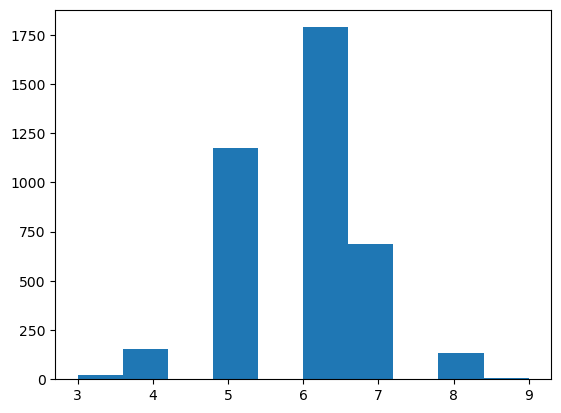

In [629]:
plt.hist(target) 
# 3, 4, 5 => 1
# 6 => 2
# 7, 8, 9 => 3

In [630]:
target.replace([3,4,5],0, inplace=True)
target.replace(6,1, inplace=True)
target.replace([7,8,9],2, inplace=True)
print(target)

0       1
1       1
2       1
3       1
4       1
       ..
3956    1
3957    0
3958    1
3959    2
3960    1
Name: quality, Length: 3961, dtype: int64


In [631]:
feature.shape # 11개

(3961, 11)

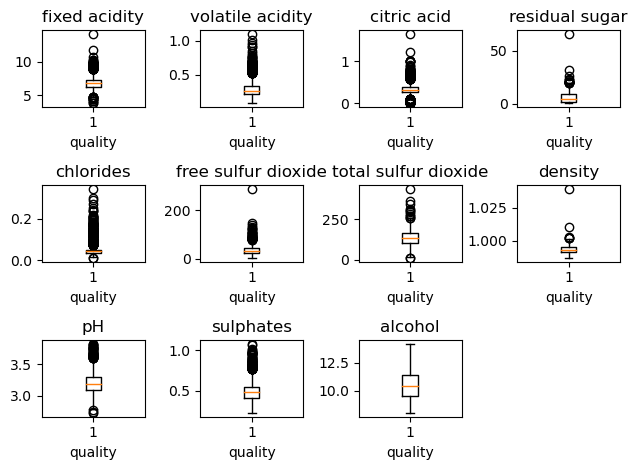

In [632]:
heejin.print_box(3,4,target,feature) # minmaxScaler 이용

In [633]:
random_max = heejin.find_random_state(feature,target)

radom_state = 10
score : 0.35510674746490756


In [634]:
# 학습용 데이터 셋 나누기
xtrain, xtest, ytrain, ytest = train_test_split(feature,target, test_size=0.2, stratify=target, random_state=random_max)

In [635]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [636]:
# 텐서로 만들기
xtrain = torch.tensor(xtrain, dtype=torch.float)

ytrain = torch.tensor(ytrain.values, dtype=torch.float)

xtest = torch.tensor(xtest, dtype=torch.float)

ytest = torch.tensor(ytest.values, dtype=torch.float)

In [637]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(torch.Size([3168, 11]),
 torch.Size([793, 11]),
 torch.Size([3168]),
 torch.Size([793]))

In [638]:
xtrain.shape[0]

3168

In [639]:
ytrain.shape

torch.Size([3168])

In [640]:
# one-hot encoding
y_one_hot = torch.zeros(3168, 3)
# torch.scatter_(input, dim, index, src)
# input: 값이 할당될 대상 텐서 - y_one_hot
# dim: 값을 할당할 차원
# index: 값이 할당될 위치를 나타내는 텐서
# src: input 텐서에 할당될 값
y_one_hot.scatter_(1, ytrain.unsqueeze(1).long(), 1)

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])

In [641]:
# 11개의 특성을 가지고 3개의 클래스로 분류
model = nn.Linear(11, 3)
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)
ytrain = ytrain.long()
epochs = 1000
for epoch in range(epochs + 1):

    # H(x) 계산
    prediction = model(xtrain)

    # cost 계산
    cost = F.cross_entropy(prediction, ytrain)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Cost: {cost.item():.6f}')

Epoch    0/1000 Cost: 1.086100
Epoch  100/1000 Cost: 1.024556
Epoch  200/1000 Cost: 1.003679
Epoch  300/1000 Cost: 0.986826
Epoch  400/1000 Cost: 0.973055
Epoch  500/1000 Cost: 0.961663
Epoch  600/1000 Cost: 0.952129
Epoch  700/1000 Cost: 0.944060
Epoch  800/1000 Cost: 0.937160
Epoch  900/1000 Cost: 0.931203
Epoch 1000/1000 Cost: 0.926016


### 회귀
- target : fixed acidity
- feature : 나머지

In [6]:
target_re = data['fixed acidity']
feature_re = data.drop('fixed acidity',axis = 1)

In [7]:
random_max = heejin.find_random_state(feature_re, target_re)

radom_state = 9
score : 0.7039810628729504


In [8]:
# 학습용 데이터 셋 나누기
xtrain_re, xtest_re, ytrain_re, ytest_re = train_test_split(feature_re, target_re, test_size=0.2, random_state=random_max)

In [9]:
scaler = MinMaxScaler()
xtrain_re = scaler.fit_transform(xtrain_re)
xtest_re = scaler.transform(xtest_re)

In [10]:
# 텐서로 만들기
xtrain_re = torch.tensor(xtrain_re, dtype=torch.float)

ytrain_re = torch.tensor(ytrain_re.values, dtype=torch.float)

xtest_re = torch.tensor(xtest_re, dtype=torch.float)

ytest_re = torch.tensor(ytest_re.values, dtype=torch.float)

In [11]:
# 가중치와 편향 선언
W = torch.zeros((11, 1), requires_grad=True) # 11행 1열
b = torch.zeros(1, requires_grad=True)

In [15]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1.1e-3) # 러닝메이트가 너무 작으니 학습속도가 느려서 조금 키움

In [18]:
epochs = 10000
min_cost = 100.0
for epoch in range(epochs + 1):
    ypre = xtrain_re.matmul(W) + b

    cost = torch.mean((ypre - ytrain_re) ** 2)

    optimizer.zero_grad() # 기울기 초기화 - 계속해서 누적되기 때문에
    cost.backward() # 비용 함수의 기울기를 계산
    optimizer.step() # W, b 업데이트
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch:4d}/{epochs} hypothesis: { ypre.squeeze().detach()} Cost: {cost.item():.6f}')
        if min_cost > cost.item():
            min_cost = cost.item()
        else:
            print('학습 종료')
            break

Epoch    0/10000 hypothesis: tensor([0.5122, 0.4994, 0.6296,  ..., 0.4802, 0.5088, 0.5620]) Cost: 39.975544
Epoch   10/10000 hypothesis: tensor([2.5063, 2.4439, 3.0778,  ..., 2.3494, 2.4897, 2.7501]) Cost: 17.488445
Epoch   20/10000 hypothesis: tensor([3.8045, 3.7103, 4.6678,  ..., 3.5663, 3.7798, 4.1750]) Cost: 7.975175
Epoch   30/10000 hypothesis: tensor([4.6502, 4.5357, 5.6996,  ..., 4.3591, 4.6205, 5.1037]) Cost: 3.949607
Epoch   40/10000 hypothesis: tensor([5.2017, 5.0743, 6.3684,  ..., 4.8759, 5.1691, 5.7095]) Cost: 2.245255
Epoch   50/10000 hypothesis: tensor([5.5616, 5.4263, 6.8012,  ..., 5.2134, 5.5275, 6.1053]) Cost: 1.522759
Epoch   60/10000 hypothesis: tensor([5.7971, 5.6570, 7.0805,  ..., 5.4341, 5.7624, 6.3645]) Cost: 1.215595
Epoch   70/10000 hypothesis: tensor([5.9516, 5.8088, 7.2600,  ..., 5.5788, 5.9167, 6.5349]) Cost: 1.084133
Epoch   80/10000 hypothesis: tensor([6.0534, 5.9092, 7.3746,  ..., 5.6742, 6.0188, 6.6474]) Cost: 1.027014
Epoch   90/10000 hypothesis: tensor

In [19]:
for i, weight in enumerate(W):
    print(f"{i}번째 가중치 : {W[i].item()}")
print(f'절편 : {b.item()}') # 값만 빼고 싶을때 W.item() - Scalar 만 가능

0번째 가중치 : 0.2638409435749054
1번째 가중치 : 0.47196200489997864
2번째 가중치 : -0.013750623911619186
3번째 가중치 : 0.40635284781455994
4번째 가중치 : 0.04618849605321884
5번째 가중치 : 0.30541548132896423
6번째 가중치 : 0.6348491907119751
7번째 가중치 : 0.16690769791603088
8번째 가중치 : 0.009627300314605236
9번째 가중치 : 0.29432928562164307
10번째 가중치 : 0.11912017315626144
절편 : 6.190293788909912


In [21]:
# 예측

test = feature_re.iloc[1]
test = scaler.transform(test.values.reshape(1, -1))

test = torch.tensor(test, dtype=torch.float)

C:\Users\kdp\.conda\envs\Torch_PY38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
pre_y= test.matmul(W) + b

print(f'pre_y => {pre_y.item()} : {ytrain_re[1].item()}')

[[3.0,10.0]] pre_y => 6.794916152954102 : 6.699999809265137
